## 1. Постановка задачи

##### В данном проекте мы решаем настоящую бизнес-задачу в области маркетинга. Нам предстоит произвести сегментацию клиентов на основе их покупательской способности, частоты совершения заказов и срока давности последнего заказа, а также определить оптимальную стратегию взаимодействия с ними.
<center> <img src=https://salesupnow.ru/storage/app/media/pipeople.png align="right" width="300"/> </center>

##### Маркетинг — неотъемлемая часть любого бизнеса. Для повышения прибыли компании важно понимать своего клиента, его пожелания и предпочтения. С появлением электронной коммерции, или онлайн-продаж, стало намного проще собирать данные о клиентах, анализировать их, находить закономерности и реализовывать маркетинговые кампании.

##### Большинство интернет-магазинов используют инструменты веб-аналитики, чтобы отслеживать просмотры страниц, количество и поведение посетителей и коэффициент отказов. Но отчёта из Google Analytics или аналогичной системы может быть недостаточно для полного понимания того, как клиенты взаимодействуют с сайтом. Компаниям важно иметь возможность быстро и точно реагировать на перемены в поведении клиентов, создавая инструменты, которые обнаруживают эти изменения практически в режиме реального времени.

##### Машинное обучение помогает поисковой системе анализировать огромное количество данных о посетителях платформы, узнавать модели поведения профессиональных покупателей, определять категорию клиентов (например, лояльные/перспективные/новички/спящие/ушедшие) и выбирать правильную стратегию взаимодействия с ними.

##### Стоит также отметить, что компании, использующие машинное обучение на своих платформах электронной коммерции, могут постоянно повышать эффективность бизнес-процессов: настраивать товарную выборку персонально для каждого покупателя и предлагать выгодную цену в соответствии с бюджетом клиента и т. д.

##### **Бизнес-задача:** произвести сегментацию существующих клиентов, проинтерпретировать эти сегменты и определить стратегию взаимодействия с ними.

##### **Техническая задача как для специалиста в Data Science:** построить модель кластеризации клиентов на основе их покупательской способности, частоты заказов и срока давности последней покупки, определить профиль каждого из кластеров.

##### **Основные цели проекта:**
##### 1. Произвести предобработку набора данных.
##### 2. Провести разведывательный анализ данных и выявить основные закономерности.
##### 3. Сформировать категории товаров и клиентов. 
##### 4. Построить несколько моделей машинного обучения, решающих задачу кластеризации клиентов, определить количество кластеров и проинтерпретировать их.
##### 5. Спроектировать процесс предсказания категории интересов клиента и протестировать нашу модель на новых клиентах.



## 2. Знакомство с данными. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import FuncFormatter

import plotly.graph_objs as go
import plotly.express as px
from plotly.subplots import make_subplots

from sklearn.mixture import GaussianMixture
from sklearn.manifold import TSNE
from sklearn import pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn import metrics
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import warnings 

from IPython.display import display, HTML

warnings.filterwarnings("ignore")

plt.rcParams["patch.force_edgecolor"] = True

##### Первым делом необходимо понять, с какими данными нам предстоит работать, и произвести базовую предобработку данных, переведя признаки в необходимые для дальнейшей работы форматы.

##### Для начала давайте познакомимся с нашими данными:

In [2]:
data = pd.read_csv(
    "data/customer_segmentation_project.csv",
    encoding="ISO-8859-1",
    dtype={'CustomerID': str,'InvoiceID': str}
)
print('Размерность данных: {}.'.format(data.shape))
data.head(5)

Размерность данных: (541909, 8).


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850,United Kingdom


##### Итак, у нас есть данные о более чем полумиллионе транзакций. Каждая из них описывается следующими признаками:

##### * InvoiceNo — номер счёта-фактуры (уникальный номинальный шестизначный номер, присваиваемый каждой транзакции; буква "C" в начале кода указывает на отмену транзакции);
##### * Stock Code — код товара (уникальное пятизначное целое число, присваиваемое каждому отдельному товару);
##### * Description — название товара;
##### * Quantity — количество каждого товара за транзакцию; 
##### * InvoiceDate — дата и время выставления счёта/проведения транзакции;
##### * UnitPrice — цена за единицу товара в фунтах стерлингов;
##### * CustomerID — идентификатор клиента (уникальный пятизначный номер, однозначно присваиваемый каждому клиенту);
##### * Country — название страны, в которой проживает клиент.

##### Проведём анализ структуры таблицы.

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  object 
 7   Country      541909 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 33.1+ MB


##### Видим, что только 2 признака кодированы как числовые.
##### Также видим, что в столбцах 'Description' и 'CustomerID' есть пропуски.

##### Нам должны были предоставить данные за годовой период — проверим, так ли это.

In [4]:
data_copy = data.copy()
data_copy['InvoiceDate'] = pd.to_datetime(data_copy['InvoiceDate'], yearfirst=False)
print("Данные представлены за период: {0} - {1}.".format(data_copy['InvoiceDate'].min(), data_copy['InvoiceDate'].max()))

Данные представлены за период: 2010-12-01 08:26:00 - 2011-12-09 12:50:00.


##### Посмотрим на максимальное количество товаров в заказе (Quantity), минимальное количество товаров в заказе и сколько стоит самый дешёвый товар (за исключением товаров с отрицательной стоимостью).

In [5]:
quantity_grouped = pd.pivot_table(
    data=data_copy,
    index='InvoiceNo',
    values='Quantity',
    aggfunc='sum'
).sort_values(by='Quantity', ascending=True)
print("Максимальное количество товаров в заказе - {0}.".format(quantity_grouped.iloc[-1].values[0]))
print("Минимальное количество товаров в заказе - {0}.".format(quantity_grouped.iloc[0].values[0]))
print("Минимальная стоимость товара - {0} фунтов стерлингов.".format(data_copy[data_copy['UnitPrice'] >= 0]['UnitPrice'].min()))

Максимальное количество товаров в заказе - 80995.
Минимальное количество товаров в заказе - -80995.
Минимальная стоимость товара - 0.0 фунтов стерлингов.


##### Видим, что есть отрицательное число товаров в заказе, и есть заказы с нулевой стоимостью. В дальнейшем постараемся разобраться с этим.

##### Теперь посмотрим, сколько уникальных клиентов покупали товары за период выгрузки датасета; сколько уникальных стран содержится в столбце Country (исключая специальный код 'Unspecified', обозначающий неопределенную страну); идентификатор самого популярного товара (StockCode).


In [6]:
print("{0} уникальных клиентов покупали товары за период выгрузки датасета.".format(data_copy['CustomerID'].nunique()))
print("{0} уникальных стран содержится в столбце Country.".format(data_copy['Country'].nunique() - 1))
print("Самый популярный товар имеет код {0}.".format(data_copy['StockCode'].mode().values[0]))

4372 уникальных клиентов покупали товары за период выгрузки датасета.
37 уникальных стран содержится в столбце Country.
Самый популярный товар имеет код 85123A.


## 3. Предобработка и очистка данных

##### На этом этапе нам предстоит подготовить наш датасет для дальнейшего моделирования, произведя очистку данных.


##### Начнем с пропусков. 

In [7]:
print("Всего в данных {0} пропущенных значений.".format(data_copy.isnull().sum().sum()))

Всего в данных 136534 пропущенных значений.


##### Пропуски в столбце с идентификатором клиента и описанием товара свидетельствуют о некорректных/незавершённых транзакциях. Удалим строки, содержащие пропуски в этих столбцах.

In [8]:
data_modified = data_copy.copy()
data_modified = data_modified.drop(index=data_modified[data_modified['CustomerID'].isnull() == True].index)
data_modified = data_modified.drop(index=data_modified[data_modified['Description'].isnull() == True].index)
print("Оставшееся число строк в таблице - {0}.".format(data_modified.shape[0]))

Оставшееся число строк в таблице - 406829.


##### Следом за пропусками проверим наличие дубликатов и удалим их.

In [9]:
print("В данных имеется {0} дублирующихся объектов.".format(data_modified.duplicated().sum()))

data_modified = data_modified.drop_duplicates()
print("Оставшееся число строк в таблице - {0}.".format(data_modified.shape[0]))

В данных имеется 5225 дублирующихся объектов.
Оставшееся число строк в таблице - 401604.


##### Ранее мы заметили, что в столбце с количеством товара (Quantity) есть отрицательные значения. Давайте разберемся, откуда они взялись. Выведем первые 5 строк таблицы, в которой значения в столбце 'Quantity' меньше 0.

In [10]:
negative_quantity = data_modified[(data_modified['Quantity'] < 0)]
print('Число объектов с отрицательными значениями количества товаров: {}'.format(negative_quantity.shape[0]))
negative_quantity.head()

Число объектов с отрицательными значениями количества товаров: 8872


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548,United Kingdom


##### Давайте проверим, что все записи из таблицы с отрицательным количеством товара действительно являются возвратными транзакциями. Если транзакция не является возвратом, но содержит отрицательное количество товара, это будет поводом считать её выбросом.

In [11]:
print("Число транзакций из данных с отрицательными значениями количества товара, не содержащие в номере заказа признак возврата - {0}.".format(
    negative_quantity[negative_quantity['InvoiceNo'].apply(lambda arg: str.find(arg, 'C') == -1)].shape[0]))

Число транзакций из данных с отрицательными значениями количества товара, не содержащие в номере заказа признак возврата - 0.


##### Таким образом, все транзакции, в которых значение количества товаров - отрицательное, действительно являются возвратными.

##### Давайте подробнее разберёмся с возвратами. Сейчас на каждый уникальный товар заведена отдельная строка в таблице — это мешает определить общее количество возвратов. Чтобы подсчитать число возвратов, сначала необходимо определить, сколько уникальных товаров указано в транзакции (корзине/basket) для каждой уникальной пары «клиент-заказ».

In [12]:
nb_products_per_basket = data_modified.groupby(by=['CustomerID', 'InvoiceNo'], as_index=False)['InvoiceDate'].count()
nb_products_per_basket = nb_products_per_basket.rename(columns = {'InvoiceDate':'Number of products'})
nb_products_per_basket.head()

,CustomerID,InvoiceNo,Number of products
0,12346,541431,1
1,12346,C541433,1
2,12347,537626,31
3,12347,542237,29
4,12347,549222,24


##### Добавим в таблицу nb_products_per_basket признак отмены заказа (order_canceled): он равен 1, если транзакция является возвратом, и 0 — в противном случае.

In [13]:
nb_products_per_basket['order_canceled'] = nb_products_per_basket['InvoiceNo'].apply(lambda arg: 1 if str.find(arg, 'C') > -1 else 0)
print("{0}% заказов являются возвратами.".format(np.round(nb_products_per_basket['order_canceled'].sum() / nb_products_per_basket.shape[0] * 100)))

16.0% заказов являются возвратами.


##### Давайте поближе взглянем на отмененные заказы:

In [14]:
nb_products_per_basket[nb_products_per_basket['order_canceled'] == 1].head()

,CustomerID,InvoiceNo,Number of products,order_canceled
1,12346,C541433,1,1
23,12352,C545329,2,1
24,12352,C545330,1,1
25,12352,C547388,7,1
39,12359,C549955,2,1


##### Найдем в таблице со всеми транзакциями записи принадлежащие клиенту с идентификатором 12346:

In [15]:
data_modified[data_modified['CustomerID'] == '12346']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346,United Kingdom
61624,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215,2011-01-18 10:17:00,1.04,12346,United Kingdom


##### Итак, вот пример пары «заказ-отмена». Обратим внимание на столбцы StockCode, UnitPrice, CustomerID и Quantity, сравним их для двух транзакций. 

##### Выдвигаем гипотезу: для каждой отменённой транзакции в базе данных (таблица data) существует её аналог с тем же кодом товара, идентификатором клиента и противоположным значением количества товара.

##### Давайте приведем контр-пример, на котором "споткнулась" наша гипотеза. Посмотрим на клиента с идентификатором 14527.

In [16]:
data_modified[data_modified['CustomerID'] == '14527'].head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527,United Kingdom
8963,537159,22112,CHOCOLATE HOT WATER BOTTLE,6,2010-12-05 13:17:00,4.95,14527,United Kingdom
8964,537159,22111,SCOTTIE DOG HOT WATER BOTTLE,1,2010-12-05 13:17:00,4.95,14527,United Kingdom
8965,537159,21479,WHITE SKULL HOT WATER BOTTLE,1,2010-12-05 13:17:00,3.75,14527,United Kingdom
8966,537159,22114,HOT WATER BOTTLE TEA AND SYMPATHY,6,2010-12-05 13:17:00,3.95,14527,United Kingdom


##### Обратим внимание на первую строку, в которой располагается заказ C536379 с признаком отмены — противоположных ему аналогов по количеству товаров мы не найдём. Возможно, причина кроется в типе товара - данный товар обозначен как товар со скидкой (значение признака StockCode - 'D'), и, по-видимому, для таких транзакций нет аналогов с положительным числом товаров в заказе. Учтём это наблюдение на будущее.

##### Выдвигаем новую гипотезу: для каждой отменённой транзакции в базе данных (таблица data) существует её аналог с тем же кодом товара, идентификатором клиента и противоположным значением количества товара, если на товар не распространяются скидки.

##### В качестве контр-примера приведем транзакции, относящиеся к клиенту с идентификатором 15311 и товаром под кодом 35004C:

In [17]:
data_modified[(data_modified['CustomerID'] == '15311') & (data_modified['StockCode'] == '35004C')]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311,United Kingdom
9200,537195,35004C,SET OF 3 COLOURED FLYING DUCKS,12,2010-12-05 13:55:00,4.65,15311,United Kingdom
18196,C537805,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-08 13:18:00,4.65,15311,United Kingdom
28630,538651,35004C,SET OF 3 COLOURED FLYING DUCKS,12,2010-12-13 15:07:00,4.65,15311,United Kingdom
39381,C539640,35004C,SET OF 3 COLOURED FLYING DUCKS,-3,2010-12-20 15:27:00,4.65,15311,United Kingdom
44157,540157,35004C,SET OF 3 COLOURED FLYING DUCKS,12,2011-01-05 11:41:00,4.65,15311,United Kingdom
59542,541293,35004C,SET OF 3 COLOURED FLYING DUCKS,12,2011-01-17 13:39:00,4.65,15311,United Kingdom
78333,C542866,35004C,SET OF 3 COLOURED FLYING DUCKS,-2,2011-02-01 12:14:00,4.65,15311,United Kingdom


##### На первой строке мы видим заказ с отменой. Однако возникает вопрос: на какой заказ пришла эта отмена, ведь более ранних записей о транзакциях, связанных с этим клиентом, нет.
##### Ответ состоит в том, что заказ на покупку данного товара от клиента поступил раньше декабря 2010 года, а этих данных в нашей таблице нет.
##### По двум следующим строкам видно, что клиент может отменить не весь заказ, а только его часть (5 декабря клиент покупает 12 единиц товара, а 8 декабря оформляет возврат только на одну единицу товара). Мы должны принять это во внимание на будущее.
##### Итак, теперь мы знаем все особенности отмены заказов. При сегментировании клиентов мы будем определять их покупательскую способность, а для этого очень важно учитывать возвраты товаров. Поэтому давайте создадим в данных о транзакциях признак QuantityCanceled, который будет указывать на количество возвращённого впоследствии товара для каждой транзакции. 
##### Сразу обговорим, что мы не будем учитывать сложные пограничные случаи:
##### 1. Отменённая транзакция не имеет противоположной (на транзакцию-возврат не нашлось ни одной транзакции на покупку).
##### 2. Количество возвращённого товара в транзакции-возврате больше, чем количество товара, которое указано в любой из отдельных транзакций на покупку (это случай, когда клиент сделал несколько заказов одного и того же товара, а потом оформил возврат на все товары разом).
##### Подготовим функцию get_quantity_canceled(). Она принимает на вход таблицу с транзакциями и возвращает объект Series — столбец, в котором указано количество возвращённого впоследствии товара для каждой транзакции. На основе результата работы этой функции мы создаём в таблице с транзакциями новый столбец QuantityCanceled.

In [18]:
def get_quantity_canceled(data):
    """Функция, считающая количество возвращённого товара для каждой транзакции во входных данных.

    Args:
        data (DataFrame): входная таблица с данными.

    Returns:
        Series: столбец с указанием количества возвращённого товара для каждой транзакции.
    """
    # Инициализируем Series той же длины, что и столбцы таблицы, нулями
    quantity_canceled = pd.Series(np.zeros(data.shape[0]), index=data.index)    
    negative_quantity = data[(data['Quantity'] < 0)].copy()
    for index, col in negative_quantity.iterrows():
        # Создаем DataFrame из всех контрагентов
        df_test = data[(data['CustomerID'] == col['CustomerID']) &
                       (data['StockCode']  == col['StockCode']) & 
                       (data['InvoiceDate'] < col['InvoiceDate']) & 
                       (data['Quantity'] > 0)].copy()
        # Транзация-возврат не имеет контрагента - ничего не делаем
        if (df_test.shape[0] == 0): 
            continue
        # Транзакция-возврат имеет ровно одного контрагента
        # Добавляем количество отмененного товара в столбец QuantityCanceled 
        elif (df_test.shape[0] == 1): 
            index_order = df_test.index[0]
            quantity_canceled.loc[index_order] = -col['Quantity']       
        # Транзакция-возврат имеет несколько контрагентов
        # Задаем количество отмененного товара в столбец QuantityCanceled для той транзакции на покупку,
        # в которой количество товара > -(количество товаров в транзакции-возврате)
        elif (df_test.shape[0] > 1): 
            df_test.sort_index(axis=0 ,ascending=False, inplace = True)        
            for ind, val in df_test.iterrows():
                if val['Quantity'] < -col['Quantity']: 
                    continue
                quantity_canceled.loc[ind] = -col['Quantity']
                break    
    return quantity_canceled

data_modified['QuantityCanceled'] = get_quantity_canceled(data_modified)

In [19]:
print("Суммарное количество отменённых товаров - {0}.".format(data_modified['QuantityCanceled'].sum()))

Суммарное количество отменённых товаров - 245266.0.


##### Теперь, когда мы разобрались с транзакциями-возвратами, они больше нам не понадобятся. Удалим из таблицы транзакции, в поле которых указано отрицательное количество товара.

In [20]:
data_modified = data_modified.drop(index=data_modified[data_modified['Quantity'] < 0].index)
print("Оставшееся число строк в таблице - {0}.".format(data_modified.shape[0]))

Оставшееся число строк в таблице - 392732.


##### Следующая проблема — это специальные виды транзакций. Например, ранее мы уже видели, что для товаров со скидкой признак StockCode обозначен как 'D'. Давайте проверим, бывают ли другие специальные коды. Найдём такие коды товаров (StockCode), которые начинаются с латинских букв (при этом коды могут содержать цифры).

In [21]:
special_codes = data_modified[data_modified['StockCode'].str.contains(pat='^[a-zA-Z]+', regex=True)]
print("Найдено {0} уникальных специальных видов транзакций: {1}".format(
    special_codes['StockCode'].nunique(), special_codes['StockCode'].unique()))

Найдено 6 уникальных специальных видов транзакций: ['POST' 'C2' 'M' 'BANK CHARGES' 'PADS' 'DOT']


##### Специальные операции не характеризуют наших клиентов, поэтому такие записи нам не нужны. Удалим все специальные транзакции из таблицы.

In [22]:
data_modified = data_modified.drop(index=special_codes.index)
print("Оставшееся число строк в таблице - {0}.".format(data_modified.shape[0]))

Оставшееся число строк в таблице - 391183.


##### Ранее при просмотре описательных статистик мы видели, что на некоторые товары установлена цена в 0 фунтов стерлингов. Давайте посмотрим, в скольких транзакциях цена за единицу товара равна 0?

In [23]:
cost_0 = data_modified[data_modified['UnitPrice'] == 0]
print("{0} транзакций содержат товары с нулевой стоимостью.".format(cost_0.shape[0]))

33 транзакций содержат товары с нулевой стоимостью.


##### Таких транзакций оказалось менее 1 %, поэтому от них можно просто избавиться. Удалим такие транзакции из таблицы.

In [24]:
data_modified = data_modified.drop(index=cost_0.index)
print("Оставшееся число строк в таблице - {0}.".format(data_modified.shape[0]))

Оставшееся число строк в таблице - 391150.


##### На этом этап очистки данных завершён. Давайте сохраним полученный результат в отдельный файл, чтобы впоследствии нам не приходилось повторять эти действия.

In [25]:
data_modified.to_csv('data/customer_segmentation_project_cleaned.csv')

In [26]:
data_cleaned = pd.read_csv('data/customer_segmentation_project_cleaned.csv')
data_cleaned = data_cleaned.drop(columns=data_cleaned.columns[0])
data_cleaned.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,QuantityCanceled
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,0.0
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,0.0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,0.0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,0.0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,0.0


## 4. Разведывательный анализ данных

##### Теперь давайте займёмся разведывательным анализом и исследуем транзакции.
##### Перед нами стоят следующие задачи:
##### * понять, клиенты из каких стран покупают больше и чаще;
##### * узнать, присутствует ли в продажах сезонность (когда покупают чаще);
##### * создать новые признаки, которые в дальнейшем понадобятся при формировании датасета о клиентах.

##### Для начала выясним, в каких странах живут клиенты. Построим график, отражающий количество клиентов в каждой из стран. Обратим внимание, что нам нужны именно уникальные клиенты.

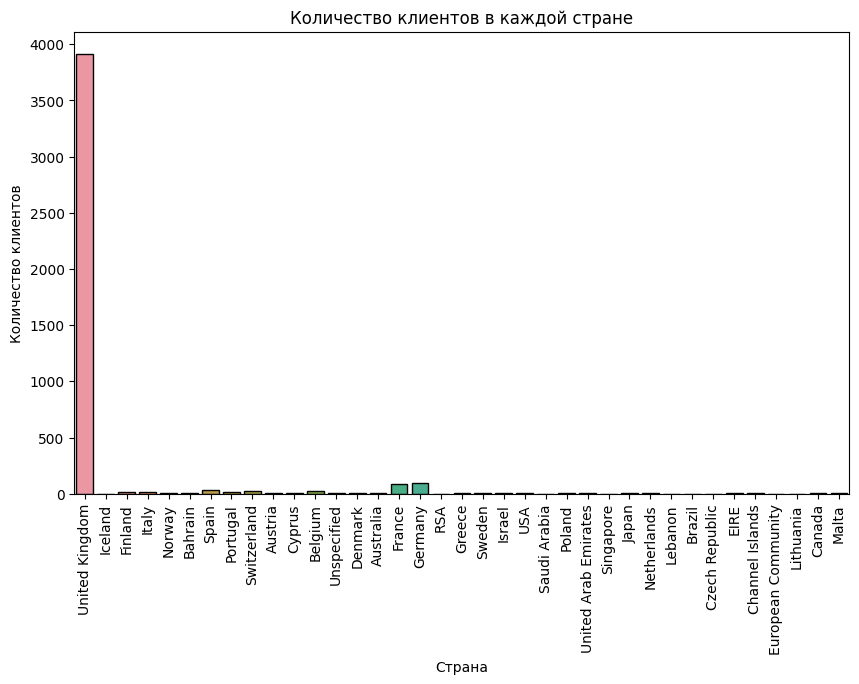

In [27]:
customer_country = data_cleaned.groupby(by='CustomerID')['Country'].max()

figure, axes = plt.subplots(figsize=(10, 6))
sns.countplot(x=customer_country, ax=axes)
axes.set_title("Количество клиентов в каждой стране")
axes.set_xlabel("Страна")
axes.set_ylabel("Количество клиентов")
axes.tick_params(axis='x', rotation=90);

##### Таким образом, больше всего клиентов из Великобритании.

##### Мы посмотрели на распределение клиентов в разрезе стран. А что насчёт заказов? Построим визуализацию и выделим топ-3 стран по количеству поступающих заказов.

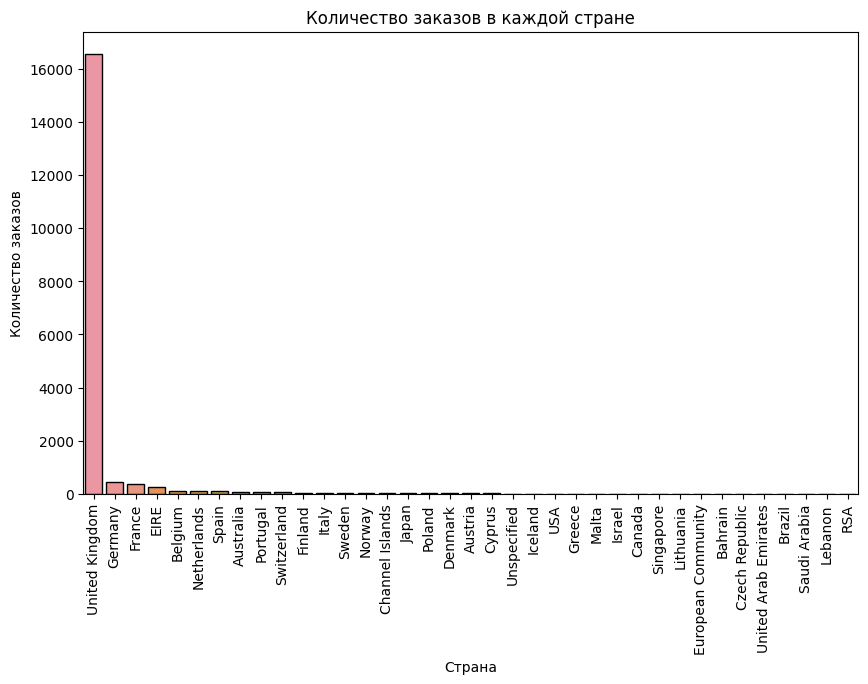

In [28]:
invoices_country = data_cleaned.groupby(by='InvoiceNo')['Country'].max()

figure, axes = plt.subplots(figsize=(10, 6))
sns.barplot(x=invoices_country.value_counts().index, y=invoices_country.value_counts().values, ax=axes)
axes.set_title("Количество заказов в каждой стране")
axes.set_xlabel("Страна")
axes.set_ylabel("Количество заказов")
axes.tick_params(axis='x', rotation=90);

##### Топ-3 стран по количеству поступающих заказов: Великобритания, Германия, Франция.

##### Давайте добавим в датасет общую цену заказа, назовём её TotalPrice.
##### Общая цена заказа рассчитывается как:
##### **общая цена = цена за единицу товара * (количество товаров в заказе - количество возвращённых товаров).**

In [29]:
data_cleaned['TotalPrice'] = data_cleaned['UnitPrice'] * (data_cleaned['Quantity'] - data_cleaned['QuantityCanceled'])
print("Средняя общая стоимость заказов - {0}.".format(round(data_cleaned['TotalPrice'].mean())))

Средняя общая стоимость заказов - 21.


##### Построим визуализацию и выделим топ-3 стран, клиенты из которых приносят компании больше всего выручки.

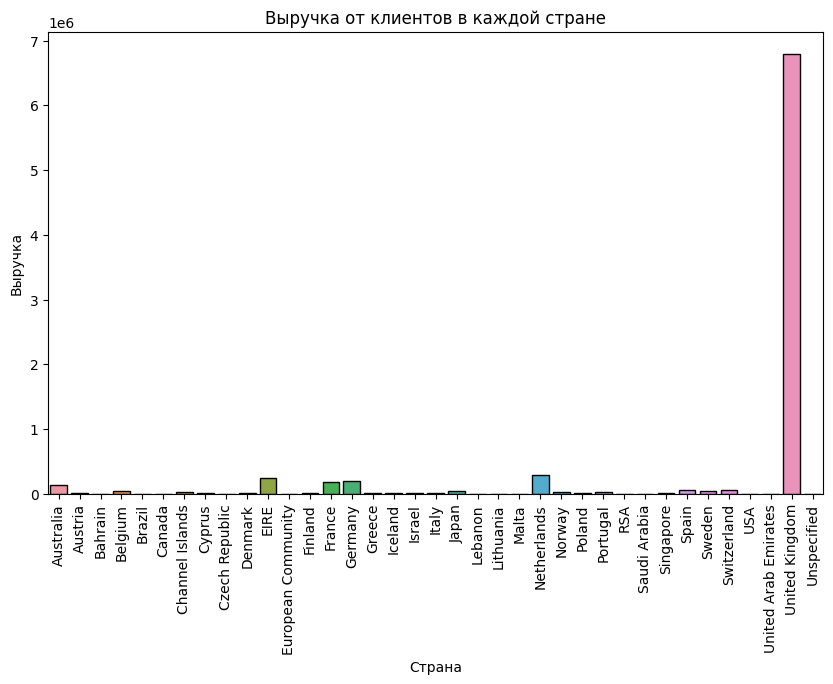

In [30]:
revenue = data_cleaned.pivot_table(
    index='CustomerID',
    values=['TotalPrice', 'Country'],
    aggfunc={'TotalPrice': 'sum', 'Country': 'max'}
)
revenue = revenue.groupby(by='Country').sum()

figure, axes = plt.subplots(figsize=(10, 6))
sns.barplot(x=revenue.index, y=revenue['TotalPrice'], ax=axes)
axes.set_title("Выручка от клиентов в каждой стране")
axes.set_xlabel("Страна")
axes.set_ylabel("Выручка")
axes.tick_params(axis='x', rotation=90);

##### Топ-3 стран по выручке: Великобритания, Нидерланды и Ирландия.

##### Теперь займёмся временными характеристиками.

##### Добавим в таблицу с транзакциями признаки месяца, дня недели и часа совершения покупки. Построим визуализацию, отражающую распределение суммарной выручки от заказов по месяцам. Укажем номер самого прибыльного для компании месяца. Предположим, почему так происходит.

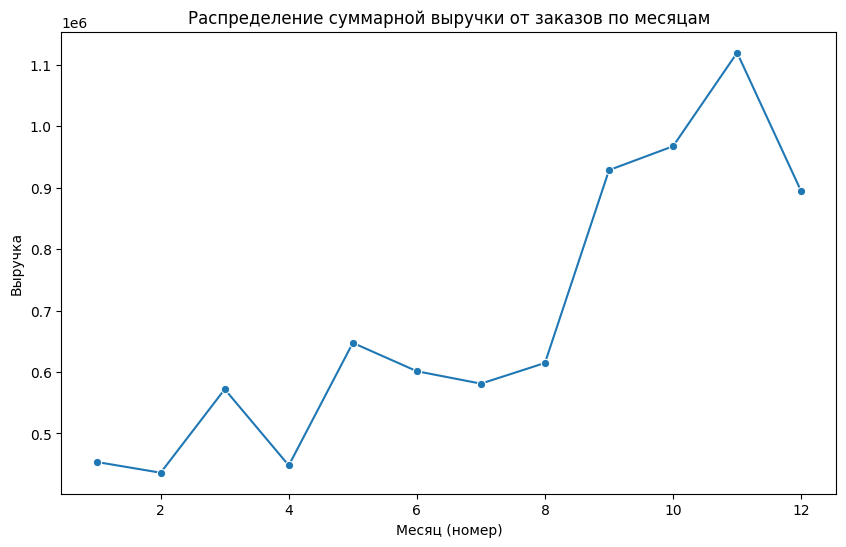

In [31]:
data_cleaned['InvoiceDate'] = pd.to_datetime(data_cleaned['InvoiceDate'], yearfirst=True)
data_cleaned['Month'] = data_cleaned['InvoiceDate'].dt.month
data_cleaned['DayOfWeek'] = data_cleaned['InvoiceDate'].dt.day_of_week
data_cleaned['Hour'] = data_cleaned['InvoiceDate'].dt.hour

revenue_month = data_cleaned.groupby(by='Month')['TotalPrice'].sum()

figure, axes = plt.subplots(figsize=(10, 6))
sns.lineplot(x=revenue_month.index, y=revenue_month, marker='o', ax=axes)
axes.set_title("Распределение суммарной выручки от заказов по месяцам")
axes.set_xlabel("Месяц (номер)")
axes.set_ylabel("Выручка");

##### Видим, что месяц с самой большой выручкой - это ноябрь. Такой результат объясняется довольно просто: ноябрь предшествует декабрю, а в декабре отмечаются католическое Рождество и Новый год. Так как мы анализируем данные магазина подарков, то совсем не удивительно, что мы видим максимальный рост продаж в преддверии этих праздников. Напротив, в январе и феврале наблюдается самая низкая выручка, что также объяснимо, поскольку большие праздники уже позади.

##### Построим визуализацию, отражающую распределение среднего количества заказов по дням недели.

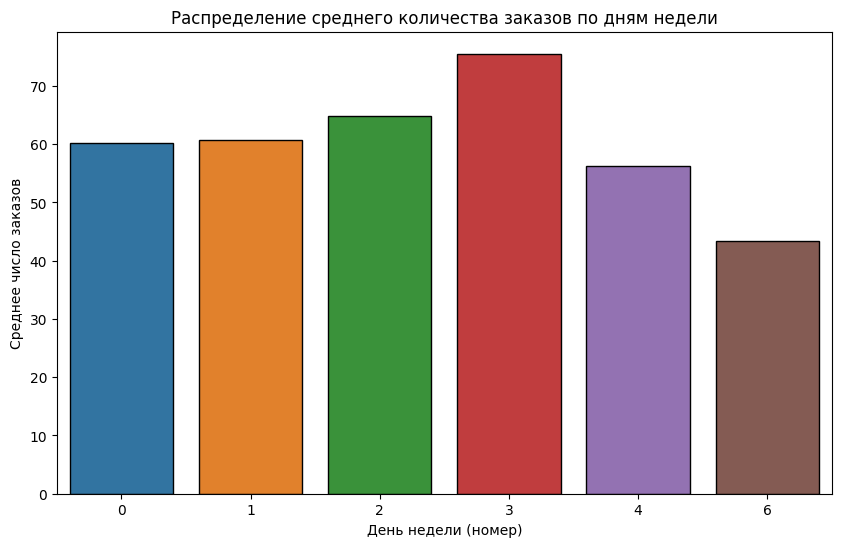

In [32]:
invoices_per_day = data_cleaned.groupby(by='DayOfWeek').agg({'InvoiceNo': 'nunique'})
invoices_count = pd.DataFrame(index=data_cleaned['InvoiceDate'].unique(), data=[i.day_of_week for i in data_cleaned['InvoiceDate'].unique()])
invoices_count['Date'] = invoices_count.index
invoices_count['Date'] = invoices_count['Date'].dt.date
invoices_count = pd.DataFrame(invoices_count.groupby(by='Date')[0].max().value_counts()).sort_index()
invoices_per_day['count'] = invoices_count['count']
invoices_per_day['mean'] = invoices_per_day['InvoiceNo'] / invoices_per_day['count']

figure, axes = plt.subplots(figsize=(10, 6))
sns.barplot(x=invoices_per_day.index, y=invoices_per_day['mean'], ax=axes)
axes.set_title("Распределение среднего количества заказов по дням недели")
axes.set_xlabel("День недели (номер)")
axes.set_ylabel("Среднее число заказов");

##### Согласно графику, нет ни одной транзакции, совершённой в субботу, что довольно странно. Возможно, суббота является выходным днём, и транзакции в этот день не совершаются, а может быть, это ошибка в данных.

##### Выделим дату из признака времени совершения транзакции. Сгруппируем данные по датам и часам совершения транзакции и найдём количество заказов на каждый день-час. Затем найдём среднее количество ежедневно поступающих заказов в каждый из часов. Построим визуализацию, отражающую распределение среднего количества ежедневно поступающих заказов по времени суток (часу совершения транзакции).

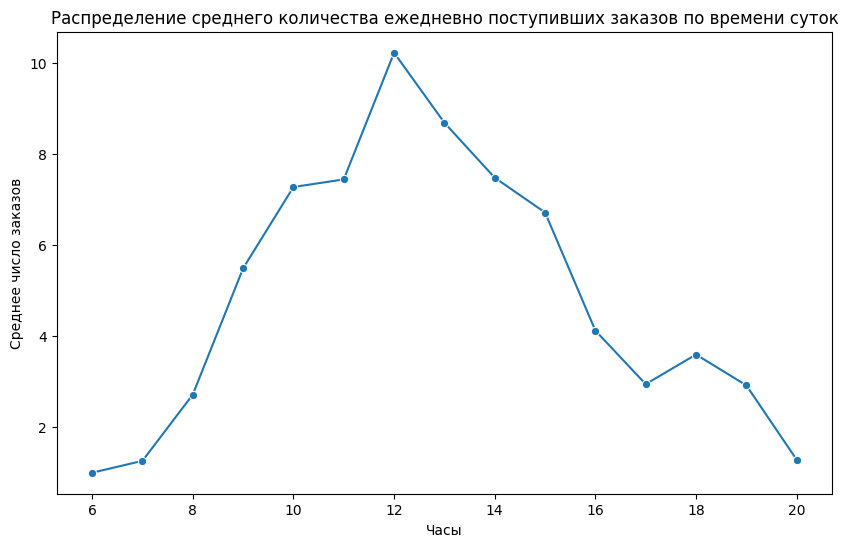

In [92]:
data_cleaned['Date'] = data_cleaned['InvoiceDate'].dt.date
day_hour_grouped = data_cleaned.groupby(by=['Date', 'Hour'], as_index=False)['InvoiceNo'].agg('nunique')
invoices_in_hours = day_hour_grouped.groupby(by='Hour', as_index=False)['InvoiceNo'].sum()
invoices_in_hours['CountHours'] = day_hour_grouped['Hour'].value_counts().sort_index().values
invoices_in_hours['Mean'] = invoices_in_hours['InvoiceNo'] / invoices_in_hours['CountHours']

figure, axes = plt.subplots(figsize=(10, 6))
sns.lineplot(x=invoices_in_hours['Hour'], y=invoices_in_hours['Mean'], marker='o', ax=axes)
axes.set_title("Распределение среднего количества ежедневно поступивших заказов по времени суток")
axes.set_xlabel("Часы")
axes.set_ylabel("Среднее число заказов");

##### Согласно графику, больше всего заказов совершается в дневное время в интервале от 10 до 15 часов. Кроме того, начиная с 21 часа вечера и до 6 утра (не включительно) заказы не поступают. Скорее всего, в этот промежуток времени компания не работает.

## 5. RFM-сегментация клиентов: часть 1

##### Теперь нам предстоит сформировать признаки, на основе которых мы будем производить сегментацию клиентов. Сегментацию клиентов будем проводить методом для анализа потребительской ценности под названием RFM. Метод заключается в группировке клиентов на основе следующих параметров:
##### * Recency (Давность) — давность последней покупки клиента;
##### * Frequency (Частота) — общее количество покупок клиента;
##### * Monetary Value (Денежная ценность) — сколько денег потратил клиент.

<center> <img src=https://miro.medium.com/max/1400/1*uYQjy9SUjW7iWHc2gGanQQ.png align="right" width="400"/> </center>

##### Суть RFM-анализа состоит в том, что мы разделяем всех клиентов на группы в зависимости от того, как давно они сделали последнюю покупку, как часто покупали и насколько большой была сумма их заказов. Например, вот так может выглядеть интерпретация кластеров для случая RF-сегментации (анализа на основе давности и частоты заказов клиента):

<img src=https://retailrocket.ru/wp-content/uploads/2017/06/rfm-1.png>

##### Мы можем рассчитать RFM-характеристики для каждого из клиентов в нашем датасете и на их основе с помощью методов кластеризации построить подобные сегменты клиентов, привязанные к нашим данным.

##### Итак, приступим к созданию нашей RFM-таблицы. Чтобы получить RFM-таблицу, нам необходимо сгруппировать данные по идентификаторам клиента и рассчитать следующие  агрегированные характеристики:
##### * Recency для i-ого клиента рассчитывается как разница между датой последнего заказа и точкой отсчета, переведенная в дни:
##### $$t_0-max(t_{i1}, t_{i2},..., t_{iM})$$
##### где $t_{ij}$ - дата совершения i-ым клиентом своей j-ой покупки.
##### В качестве точки отсчета $t_0$ берем дату на 1 день "старше", чем все наши данные. Это будет 10 декабря 2011 года (в формате datetime - '2011-12-10').
##### * Frequency рассчитывается как общее количество уникальных заказов, которые совершил i-ый клиент.
##### * Monetary Value рассчитывается как общая сумма денег, которую i-ый клиент потратил на наши товары (с учетом возвратов).

In [93]:
rfm_table = data_cleaned.groupby(by='CustomerID').agg({'Date': 'max', 'InvoiceNo': 'nunique', 'TotalPrice': 'sum'})
rfm_table['Date'] = rfm_table['Date'].apply(lambda arg: (pd.to_datetime("2011-12-09", yearfirst=True).date() - arg).days)
rfm_table = rfm_table.rename(columns={'Date': 'Recency', 'InvoiceNo': 'Frequency', 'TotalPrice': 'Monetary'})
rfm_table.head()

,Recency,Frequency,Monetary
CustomerID,,,
12346,325,1,0.00
12347,2,7,4310.00
12348,75,4,1437.24
12349,18,1,1457.55
12350,310,1,294.40


In [94]:
print("{0} клиентов совершили покупку более 200 дней назад.".format(rfm_table[rfm_table['Recency'] > 200].shape[0]))
print("В среднем клиент делает {0} заказов.".format(np.round(rfm_table['Frequency'].mean())))
print("Общая сумма денег, потраченная клиентов с идентификатором 12360, составляет {0} фунтов стерлингов.".format(
    np.round(rfm_table.loc[12360]['Monetary'].sum())))

743 клиентов совершили покупку более 200 дней назад.
В среднем клиент делает 4.0 заказов.
Общая сумма денег, потраченная клиентов с идентификатором 12360, составляет 2302.0 фунтов стерлингов.


##### Теперь давайте взглянем на коробчатые диаграммы для каждого из признаков:

In [95]:
boxes = [px.box(rfm_table, x=column) for column in rfm_table.columns]
fig = make_subplots(
    rows=1, cols=3, 
    subplot_titles=(
        "Recency", "Frequency", "Monetary"
    )
)

for i, box in enumerate(boxes):
    fig.add_trace(boxes[i]['data'][0], row=1, col=i+1)

fig.update_layout(showlegend=True)
fig.write_html('data/boxplots.html')
fig.show()

###### Если график не прогружается, можете посмотреть его в папке data.

##### Что интересного здесь можно увидеть? Есть клиенты с аномально большим количеством сделанных заказов (более 100 штук), а также клиенты, общая стоимость заказов которых превышает 190 тысяч фунтов стерлингов.
##### Чем это плохо? Выбросы могут отрицательно сказаться на результатах работы методов кластеризации, неустойчивых к ним, например, алгоритма KMeans, поэтому хотелось бы от них избавиться. Однако терять много ценных данных о клиентах тоже не хочется, поэтому ограничимся верхней границей соответствующей квантили уровня 0.95. Таким образом, мы удалим данные тех клиентов, для которых значение параметра Frequency или параметра Monetary выше, чем у 95 % клиентов.


##### Удалим из RFM-таблицы записи о клиентах, для которых выполняется хотя бы одно из условий:
##### $$frequency >frequency_{0.95}$$
##### $$monetary >monetary_{0.95}$$ 
##### где $frequency_{0.95}$ и $monetary_{0.95}$ - квантили уровня 0.95 для соответствующих признаков. 

In [96]:
frequency_95 = rfm_table['Frequency'].quantile(0.95)
monetary_95 = rfm_table['Monetary'].quantile(0.95)
rfm_table_cleaned = rfm_table.drop(index=rfm_table[(rfm_table['Frequency'] > frequency_95) | (rfm_table['Monetary'] > monetary_95)].index)

print("Оставшееся число строк в таблице - {0}.".format(rfm_table_cleaned.shape[0]))

Оставшееся число строк в таблице - 4044.


##### Посмотрим, какие коробчатые диаграммы у нас получились сейчас:

In [97]:
boxes = [px.box(rfm_table_cleaned, x=column) for column in rfm_table_cleaned.columns]
fig = make_subplots(
    rows=1, cols=3, 
    subplot_titles=(
        "Recency", "Frequency", "Monetary"
    )
)

for i, box in enumerate(boxes):
    fig.add_trace(boxes[i]['data'][0], row=1, col=i+1)

fig.update_layout(showlegend=True)
fig.write_html('data/boxplots_cleaned.html')
fig.show()

###### Если график не прогружается, можете посмотреть его в папке data.

##### Мы наконец добрались до этапа кластеризации. Для начала нам необходимо оценить, как распределены наблюдения в пространстве признаков. Благо, у нас всего три параметра, по которым мы хотим кластеризовать клиентов, поэтому данные можно визуализировать в виде трёхмерной диаграммы рассеяния. Построим визуализацию нашего трёхмерного пространства признаков:

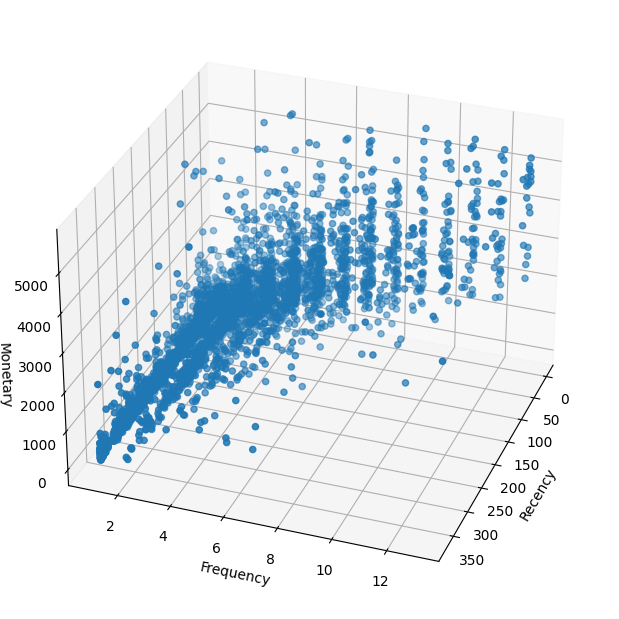

In [98]:
# создадим трёхмерный объект
fig = plt.figure(figsize=(6,6))
ax = Axes3D(fig)
# добавим дополнительную ось в объект картинки
fig.add_axes(ax)
ax.azim = 20
ax.elev = 30

# визуализируем данные, передав значения x, y, z, а также информацию о группировке данных по цветам
ax.scatter(
    rfm_table_cleaned['Recency'].to_list(), 
    rfm_table_cleaned['Frequency'].to_list(),
    rfm_table_cleaned['Monetary'].to_list()
)
# добавим оси
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary');


##### Что здесь можно увидеть? На самом деле, ничего конкретного. Да, видно, что есть клиенты с большими значениями параметров Monetary и Frequency — вероятно, это лучшие клиенты, которые покупают чаще всего и приносят больше всего денег. Однако по общей массе точек сложно сказать, сколько кластеров у нас есть — скорее даже кажется, что пространство не поддаётся кластеризации. Давайте призовём на помощь методы снижения размерности.

##### Начнём с метода главных компонент (PCA). Нам известно, что для его стабильной работы данные необходимо стандартизировать/нормализовать. Давайте для удобства обернём эти шаги по предобработке данных в pipeline.
##### Создадим pipeline, в котором будут следующие шаги:
##### * стандартизация с помощью StandardScaler с параметрами по умолчанию; 
##### * метод главных компонент с двумя компонентами.
##### Обучим наш pipeline на RFM-таблице, очищенной от выбросов, и применим к ней трансформацию.

In [99]:
pipeLine = pipeline.Pipeline([('scaler', StandardScaler()), ('PCA', PCA(n_components=2))])
pipeLine.fit(rfm_table_cleaned)
rfm_table_processed = pd.DataFrame(pipeLine.transform(rfm_table_cleaned))
print("Первая главная компонента объясняет {0} долю дисперсии.".format(np.round(pipeLine['PCA'].explained_variance_ratio_[0], 2)))

Первая главная компонента объясняет 0.68 долю дисперсии.


##### Визуализировав пространство главных компонент после декомпозиции мы получим следующую картину:

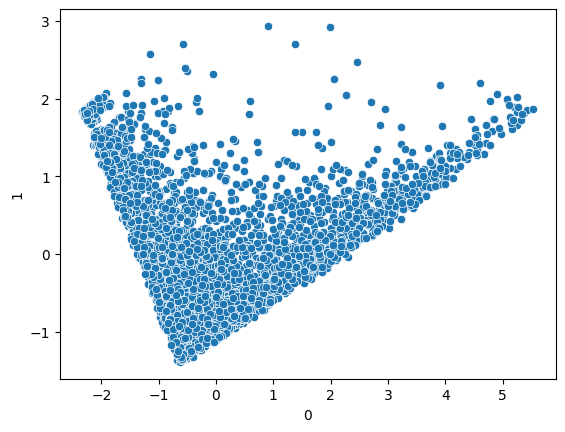

In [100]:
sns.scatterplot(data=rfm_table_processed, x=0, y=1);

##### Попробуем разделить это пространство главных компонент на сегменты. 
##### Судя по форме пространства, мы можем с уверенностью сказать, что нам не подойдут алгоритмы, основанные на плотности, такие как DBSCAN, так как точки расположены очень близко друг к другу и большая часть точек будет определена в единый кластер, что не имеет смысла.

##### Попробуем воспользоваться методом k-means. Подберём оптимальное количество кластеров для метода k-means с помощью коэффициента силуэта, перебирая возможные значения от 2 до 10 включительно. В качестве значения параметра random_state возьмём число 42. Остальные параметры оставим по умолчанию.

In [101]:
clusters_counts = np.arange(2, 11)
silhouettes = []
for i in clusters_counts:
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(rfm_table_processed)
    silhouettes.append(np.round(metrics.silhouette_score(rfm_table_processed, kmeans.predict(rfm_table_processed)), 2))
silhouette_max = np.max(silhouettes)
print("Максимальный коэффициент силуэта равен {0}, соответствующее ему число кластеров - {1}.".format(
    silhouette_max, clusters_counts[silhouettes.index(silhouette_max)]))

Максимальный коэффициент силуэта равен 0.52, соответствующее ему число кластеров - 3.


##### Теперь возьмём EM-алгоритм. Подберём оптимальное количество кластеров для EM-алгоритма (GaussianMixture) с помощью коэффициента силуэта, перебирая возможные значения от 2 до 10 включительно. В качестве значения параметра random_state возьмём число 42. Остальные параметры оставим по умолчанию.

In [102]:
silhouettes_EM = []
for i in clusters_counts:
    EM = GaussianMixture(n_components=i, random_state=42)
    EM.fit(rfm_table_processed)
    silhouettes_EM.append(np.round(metrics.silhouette_score(rfm_table_processed, EM.predict(rfm_table_processed)), 2))
silhouette_EM_max = np.max(silhouettes_EM)
print("Максимальный коэффициент силуэта равен {0}, соответствующее ему число кластеров - {1}.".format(
    silhouette_EM_max, clusters_counts[silhouettes_EM.index(silhouette_EM_max)]))

Максимальный коэффициент силуэта равен 0.44, соответствующее ему число кластеров - 3.


##### Теперь давайте посмотрим на распределение кластеров. Выберем лучшую модель среди 2 предыдущих. И таковой является именно модель KMeans, поскольку максимальный коэфициент силуэта для алгоритма KMeans больше такого же коэффициента для алгоритма EM.
##### Обучим лучшую модель с подобранным ранее количеством кластеров на декомпозированных данных.

In [103]:
kmeans_best = KMeans(n_clusters=3, random_state=42)
kmeans_best.fit(rfm_table_processed)
labels = kmeans_best.predict(rfm_table_processed)
labels = pd.Series(labels)
print("В самом большом кластере {0} клиентов.".format(labels.value_counts().sort_values(ascending=False).iloc[0]))

В самом большом кластере 2269 клиентов.


##### Визуализируем результаты кластеризации:

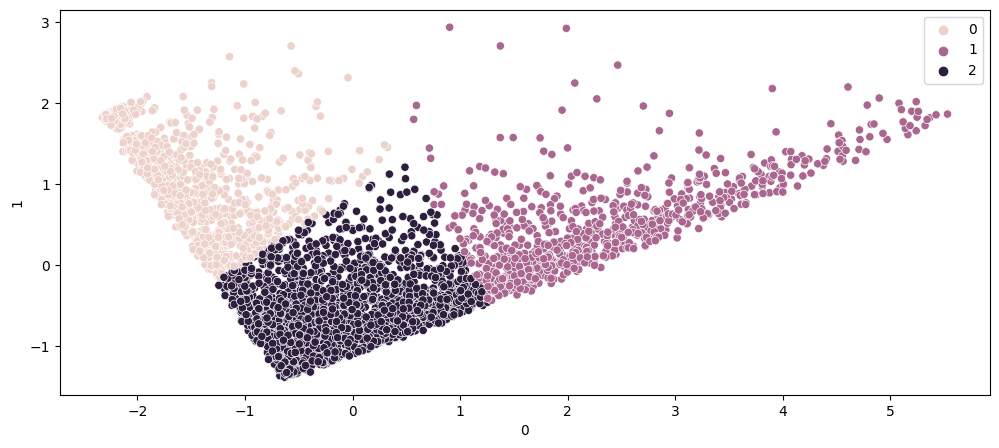

In [104]:
fig = plt.figure(figsize=(12, 5))
sns.scatterplot(
    data=rfm_table_processed, 
    x=0, 
    y=1, 
    hue=labels,
);

##### Итак, у нас есть три сегмента клиентов. Давайте попробуем составить профиль для этих сегментов.

##### Для составления профиля кластеров нам необходимо вернуться от декомпозированных данных к RFM-таблице, очищенной от выбросов. Сгруппируем RFM-таблицу по полученным кластерам и рассчитаем среднее по каждому из признаков.

In [105]:
rfm_table_cleaned_labels = rfm_table_cleaned.copy()
rfm_table_cleaned_labels['Label'] = kmeans_best.predict(rfm_table_processed)
rfm_labels_mean = rfm_table_cleaned_labels.groupby(by='Label').agg('mean')
rfm_labels_mean

,Recency,Frequency,Monetary
Label,,,
0,253.474474,1.403403,386.277297
1,31.943299,7.068299,2657.746997
2,51.221684,2.329220,660.068947


##### Давайте реализуем собственную функцию plot_cluster_profile(), которая позволяет визуализировать профиль каждого из кластеров в виде полярной диаграммы. У этой функции два параметра: grouped_data — сгруппированные по кластерам характеристики объектов (клиентов), n_clusters — количество кластеров.

In [106]:
def plot_cluster_profile(grouped_data, n_clusters):
    """_summary_

    Args:
        grouped_data (_type_): _description_
        n_clusters (_type_): _description_
    """
    # Нормализуем сгруппированные данные, приводя их к масштабу 0-1.
    scaler = MinMaxScaler()
    grouped_data = pd.DataFrame(scaler.fit_transform(grouped_data), columns=grouped_data.columns)
    # Создаем список признаков
    features = grouped_data.columns
    # Создаем пустую фигуру
    fig = go.Figure()
    # В цикле визуализируем полярную диаграмму для каждого кластера
    for i in range(n_clusters):
        # Создаем полярную диаграмму и добавляем ее на общий график
        fig.add_trace(go.Scatterpolar(
            r=grouped_data.iloc[i].values, # радиусы
            theta=features, # название засечек
            fill='toself', # заливка многоугольника цветом
            name=f'Cluster {i}', # название - номер кластера
        ))
    # Обновляем параметры фигуры
    fig.update_layout(
        showlegend=True, # отображение легенды
        autosize=False, # устаналиваем свои размеры графика
        width=800, # ширина (в пикселях)
        height=800, # высота (в пикселях)
    )
    # Отображаем фигуру
    fig.show()

##### Визуализируем профили кластеров в виде полярной диаграммы на основе средних RFM-характеристик, вычисленных для каждого кластера. Проанализируем кластеры и на основе анализа составим их описания.

In [107]:
plot_cluster_profile(rfm_labels_mean, 3)

##### Кластер 0: кластер соответствует «потерянным» клиентам, которые купили меньше всего товара, и их последняя покупка была совершена очень давно.
##### Кластер 1: кластер соответствует «промежуточным» клиентам, которые являются активными, но покупают не так часто и много, как лояльные клиенты. В то же время эти клиенты не являются «потерянными».
##### Кластер 2: кластер соответствует «лояльным» клиентам, которые приносят наибольший доход, совершают покупки чаще всего, а давность их последней покупки наименьшая.

### 4. RFM-сегментация клиентов: часть 2

##### Итак, с помощью RFM-анализа нам удалось выделить три сегмента клиентов. Однако давайте попробуем распределить наших клиентов на 5-7 кластеров.
##### Ранее мы производили кластеризацию в пространстве главных компонент. Вспомним, что PCA является линейным методом отображения исходного пространства признаков в его сжатую версию. А что если использовать нелинейную трансформацию? Например, алгоритм снижения размерности t-SNE. Давайте попробуем и посмотрим, что получится.

##### Воспользуемся алгоритмом t-SNE и трансформируем RFM-таблицу, очищенную от выбросов, в двухмерное представление. Также заранее позаботимся о масштабировании признаков. Давайте для удобства обернём шаги по предобработке данных в pipeline.
##### Создадим pipeline, который будет содержать следующие шаги:
##### * стандартизация с помощью StandardScaler с параметрами по умолчанию; 
##### * алгоритм t-SNE с двумя компонентами, параметрами perplexity=50 и random_state=100.
##### Обучим наш pipeline на RFM-таблице (очищенной от выбросов), полученной ранее, и применим к ней трансформацию.

In [108]:
pipeline_scaler_tSNE = pipeline.Pipeline([('scaler', StandardScaler()),
                                          ('t_SNE', TSNE(n_components=2, perplexity=50, random_state=100))])
#pipeline_scaler_tSNE.fit(rfm_table_cleaned)
rfm_table_processed = pd.DataFrame(pipeline_scaler_tSNE.fit_transform(rfm_table_cleaned))
print("Дивергенция Кульбака-Лейблера равна {0}.".format(np.round(pipeline_scaler_tSNE['t_SNE'].kl_divergence_, 2)))

Дивергенция Кульбака-Лейблера равна 0.54.


##### Визуализировав пространство после декомпозиции с помощью t-SNE, мы получим следующую картину:

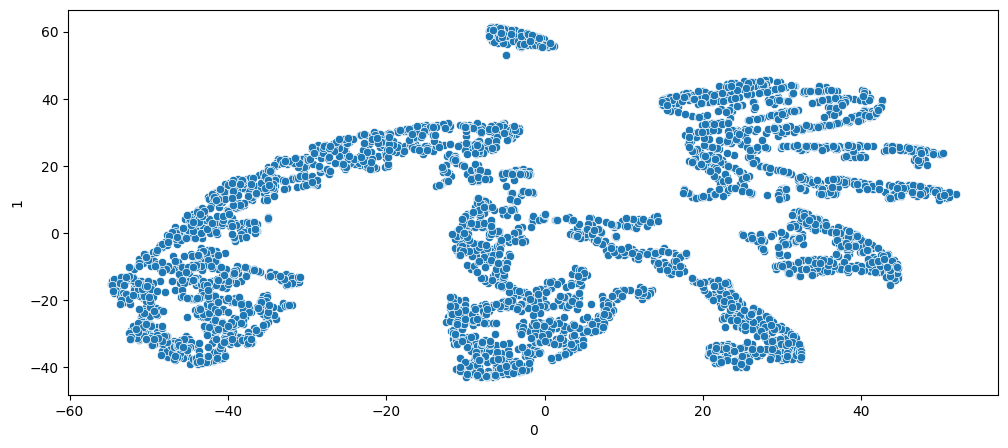

In [109]:
fig = plt.figure(figsize=(12, 5))
sns.scatterplot(data=rfm_table_processed, x=0, y=1);

##### Как и ожидалось от t-SNE, алгоритм сгруппировал наиболее похожие объекты в подобие кластеров, причём эти кластеры легко определить. Теперь давайте воспользуемся алгоритмами кластеризации, чтобы сформировать новые сегменты клиентов.

##### Попробуем воспользоваться методом k-means. Подберём оптимальное количество кластеров для метода k-means с помощью коэффициента силуэта, перебирая возможные значения от 3 до 8 включительно. В качестве значения параметра random_state возьмите число 42. Остальные параметры оставим по умолчанию.

In [128]:
clusters_counts = np.arange(3, 9)
silhouettes = []
for i in clusters_counts:
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(rfm_table_processed)
    silhouettes.append(metrics.silhouette_score(rfm_table_processed, kmeans.predict(rfm_table_processed)))

silhouette_max = np.max(silhouettes)
max_counts = silhouettes.count(silhouette_max)
if max_counts == 1:
    cluster_count_best = clusters_counts[silhouettes.index(silhouette_max)]
else:
    silhouettes.reverse()
    cluster_count_best = clusters_counts[-1::-1][silhouettes.index(silhouette_max)]

print("Максимальное значение коэффициента силуэта - {0}, соответствующее ему число кластеров - {1}.".format(
    silhouette_max, cluster_count_best
))

Максимальное значение коэффициента силуэта - 0.4844948947429657, соответствующее ему число кластеров - 7.


##### Попробуем воспользоваться EM-алгоритом. Подберём оптимальное количество кластеров для EM-алгоритма (GaussianMixture) с помощью коэффициента силуэта, перебирая возможные значения от 3 до 8 включительно. В качестве значения параметра random_state возьмём число 42. Остальные параметры оставим по умолчанию.

In [129]:
silhouettes_EM = []
for i in clusters_counts:
    EM = GaussianMixture(n_components=i, random_state=42)
    EM.fit(rfm_table_processed)
    silhouettes_EM.append(metrics.silhouette_score(rfm_table_processed, EM.predict(rfm_table_processed)))

silhouette_EM_max = np.max(silhouettes_EM)
max_counts = silhouettes_EM.count(silhouette_EM_max)
if max_counts == 1:
    cluster_count_best = clusters_counts[silhouettes_EM.index(silhouette_EM_max)]
else:
    silhouettes_EM.reverse()
    cluster_count_best = clusters_counts[-1::-1][silhouettes_EM.index(silhouette_EM_max)]

print("Максимальное значение коэффициента силуэта - {0}, соответствующее ему число кластеров - {1}.".format(
    silhouette_EM_max, cluster_count_best
))

Максимальное значение коэффициента силуэта - 0.4688269793987274, соответствующее ему число кластеров - 4.


##### Наконец, попробуем воспользоваться алгоритмом алгомеративной кластеризации (AgglomerativeClustering). Подберём оптимальное количество кластеров для алгоритма агломеративной кластеризации с помощью коэффициента силуэта, перебирая возможные значения от 2 до 8 включительно. Все параметры, за исключением числа кластеров, оставим по умолчанию.

In [130]:
clusters_counts = np.arange(2, 9)
silhouettes_aggl = []
for i in clusters_counts:
    aggl = AgglomerativeClustering(n_clusters=i)
    aggl.fit(rfm_table_processed)
    silhouettes_aggl.append(metrics.silhouette_score(rfm_table_processed, aggl.labels_))

silhouette_aggl_max = np.max(silhouettes_aggl)
max_counts = silhouettes_aggl.count(silhouette_aggl_max)
if max_counts == 1:
    cluster_count_best = clusters_counts[silhouettes_aggl.index(silhouette_aggl_max)]
else:
    silhouettes_aggl.reverse()
    cluster_count_best = clusters_counts[-1::-1][silhouettes_aggl.index(silhouette_aggl_max)]

print("Максимальное значение коэффициента силуэта - {0}, соответствующее ему число кластеров - {1}.".format(
    silhouette_aggl_max, cluster_count_best
))

Максимальное значение коэффициента силуэта - 0.4790458083152771, соответствующее ему число кластеров - 8.


##### Давайте посмотрим на распределение кластеров. В качестве алгоритма кластеризации возьмём алгоритм KMeans, как алгоритм, показавший наилучший коэфиициент силуэта.
##### Обучим лучшую модель с подобранным ранее количеством кластеров на декомпозированных данных.

In [131]:
kmeans_best = KMeans(n_clusters=7, random_state=42)
kmeans_best.fit(rfm_table_processed)
labels = kmeans_best.predict(rfm_table_processed)
labels = pd.Series(labels)
print("{0} клиентов попало в самый большой кластер.".format(labels.value_counts().sort_values(ascending=False).iloc[0]))

914 клиентов попало в самый большой кластер.


##### Визуализируем результаты кластеризации:

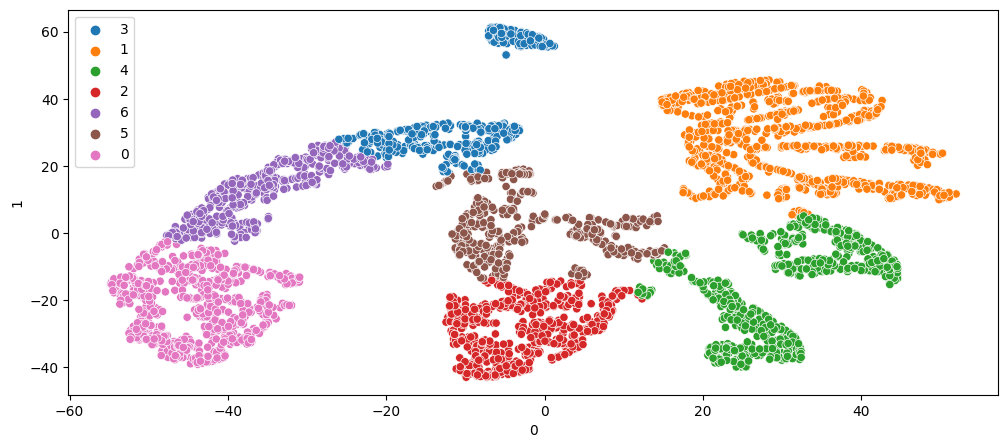

In [132]:
fig = plt.figure(figsize=(12, 5))
sns.scatterplot(data=rfm_table_processed, x=0, y=1, hue=kmeans_best.labels_.astype('str'));

##### Итак, у нас есть 7 сегментов клиентов. Давайте попробуем составить профиль для этих сегментов. 

##### Для составления профиля кластеров нам необходимо вернуться от декомпозированных данных к RFM-таблице (очищенной от выбросов). Сгруппируем RFM-таблицу по полученным кластерам и рассчитаем среднее по каждому из признаков. Для наглядности округлим все значения в столбцах до целого числа.

In [133]:
rfm_table_cleaned_labels = rfm_table_cleaned.copy()
rfm_table_cleaned_labels['Label'] = kmeans_best.predict(rfm_table_processed)
rfm_labels_mean = np.round(rfm_table_cleaned_labels.groupby(by='Label').agg('mean'))
rfm_labels_mean

,Recency,Frequency,Monetary
Label,,,
0,46.0,1.0,322.0
1,32.0,7.0,2417.0
2,40.0,2.0,614.0
3,313.0,1.0,261.0
4,40.0,3.0,995.0
5,196.0,2.0,670.0
6,181.0,1.0,273.0


##### Визуализируем профили кластеров в виде полярной диаграммы на основе средних RFM-характеристик, вычисленных для каждого кластера. Проанализируем кластеры и на основе анализа составим их описания.

In [134]:
plot_cluster_profile(rfm_labels_mean, 7)

##### Кластер 1: кластер соответствует «лояльным» клиентам, которые приносят наибольший доход, совершают покупки чаще всего, а давность их последней покупки наименьшая.
##### Кластер 4: кластер соответствует «перспективным» клиентам, которые являются активными покупателями, но покупают не так часто и не так много, как лояльные клиенты.
##### Кластер 2: кластер соответствует «подвисшим» клиентам, которые относительно недавно сделали несколько заказов на небольшие суммы. Потенциально эти клиенты могут быть переведены в кластер «перспективных».
##### Кластер 5: кластер соответствует клиентам «в зоне риска», которые несколько раз покупали товары на небольшие суммы, однако их последняя покупка была совершена более пяти месяцев назад.
##### Кластер 0: кластер соответствует клиентам-«новичкам», которые относительно недавно сделали один заказ на небольшую сумму. 
##### Кластер 6: кластер соответствует «спящим» или «почти потерянным» клиентам, которые сделали один заказ на маленькую сумму более семи месяцев назад и больше не возвращались.
##### Кластер 3: кластер соответствует «потерянным» клиентам, которые купили меньше всего товара, и их последняя покупка была совершена около года назад.

## 7. RFM-кластеризация клиентов: часть 3

##### Мы построили модель кластеризации для части клиентов. Но как сделать предсказание сегмента для клиентов, которые не попали в обучающую выборку?
##### Вспомним, что мы обучали наши алгоритмы кластеризации на сжатом с помощью t-SNE пространстве признаков. То есть, чтобы сделать предсказание для новых объектов, не попавших в выборку, нам необходимо будет совершить трансформацию признаков этих объектов в новое сжатое пространство. 
##### Однако проблема t-SNE заключается в том, что алгоритм непараметрический. Это значит, что он, в отличие от таких алгоритмов, как PCA и SVD, не создаёт явной функции отображения. Проще говоря, алгоритм трансформирует пространство признаков для обучающей выборки, но не запоминает, каким образом это делает. Это значит, что, передав в алгоритм новые объекты для сжатия пространства, мы получим абсолютно новое представление пространства, не имеющее отношения к тому, что мы построили для обучающей выборки. То есть произойдёт искажение, что может привести к неверным результатам кластеризации.
##### Именно поэтому у класса TSNE из библиотеки sklearn нет такого метода, как transform(), у него есть только метод fit_transform() — заново обучить алгоритм t-SNE и произвести трансформацию.
##### Как же тогда производить кластеризацию для новых объектов, если мы не можем сжимать размерность для новых данных?
##### Давайте сведём задачу кластеризации к задаче классификации. Действительно, у нас теперь есть истинные метки кластеров, а есть клиенты, которые описываются RFM-характеристиками. Давайте обучим модель, которая на основе RFM-характеристик будет предсказывать клиентский сегмент. 

In [135]:
# Создаём матрицу наблюдений X и вектор правильных ответов y
X = rfm_table_cleaned #очищенная RFM-таблица
y = labels #метки кластеров, предсказанные ранее

##### Разделим исходные данные на тренировочную и тестовую выборки в соотношении 80/20. В качестве параметра random_state возьмём число 42.

In [136]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)
print("{0} клиентов попали в тестовую выборку.".format(X_test.shape[0]))

809 клиентов попали в тестовую выборку.


##### Дальше нам осталось только построить несколько моделей и выбрать из них лучшую. Мы знаем, что алгоритм t-SNE является нелинейным методом понижения размерности. Можно смело предположить, что линейные модели, такие как логистическая регрессия, в данной задаче нам мало чем помогут. Поэтому давайте сразу возьмём тяжелую артиллерию — ансамблевые алгоритмы. 

##### Начнём со случайного леса. С помощью GridSearchCV организуем перебор параметров случайного леса (RandomForestClassifier). В качестве параметра random_state для модели случайного леса используем число 42. В качестве метрики используем accuracy. Количество фолдов для кросс-валидации — 5.

In [137]:
param_grid = {
    'max_depth': range(5, 15),
    'criterion': ['gini', 'entropy'],
    'n_estimators': [100, 200, 500]
}

grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    scoring='accuracy',
    n_jobs=2,
    cv=5
)
grid_search.fit(X_train, y_train)
print("Оптимальная максимальная глубина леса - {0}.".format(grid_search.best_params_['max_depth']))

y_pred = grid_search.predict(X_test)
print("Accuracy: {0}.".format(np.round(metrics.accuracy_score(y_test, y_pred), 3)))

Оптимальная максимальная глубина леса - 13.
Accuracy: 0.985.


##### Итак, значение метрики accuracy очень высокое, но не идеальное. Давайте попробуем его улучшить, воспользовавшись бустингом.

##### С помощью GridSearchCV организуем перебор параметров градиентного бустинга (GradientBoostingClassifier). В качестве параметра random_state для модели градиентного бустинга используем число 42. В качестве метрики используем accuracy. Количество фолдов для кросс-валидации — 5.

In [138]:
param_grid = {
    'max_depth': range(3, 7),
    'learning_rate': [0.001, 0.01, 0.1],
    'n_estimators': [100, 200, 500]
}

grid_search = GridSearchCV(
    estimator=GradientBoostingClassifier(random_state=42),
    param_grid=param_grid,
    scoring='accuracy',
    n_jobs=2,
    cv=5
)
grid_search.fit(X_train, y_train)
print("Оптимальная максимальная глубина деревьев - {0}.".format(grid_search.best_params_['max_depth']))

y_pred = grid_search.predict(X_test)
print("Accuracy: {0}.".format(np.round(metrics.accuracy_score(y_test, y_pred), 3)))

Оптимальная максимальная глубина деревьев - 4.
Accuracy: 0.983.


##### Отлично, мы справились с проблемой непараметричности t-SNE и смогли перейти от решения задачи кластеризации к задаче классификации. Теперь у нас есть модель, которая на основе RFM-характерик клиента автоматически определяет его сегмент.